In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
cleaned_df = pd.read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\FrostMart\EDA\cleaned_data.csv')

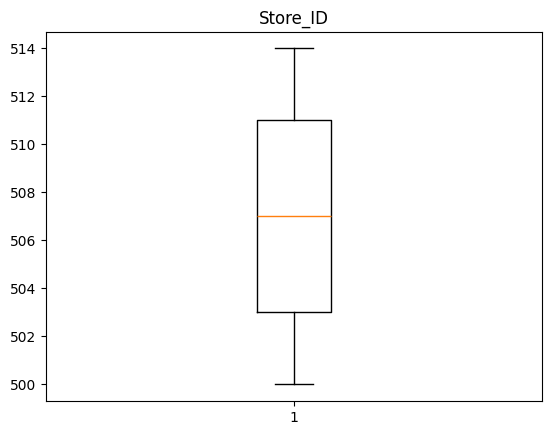

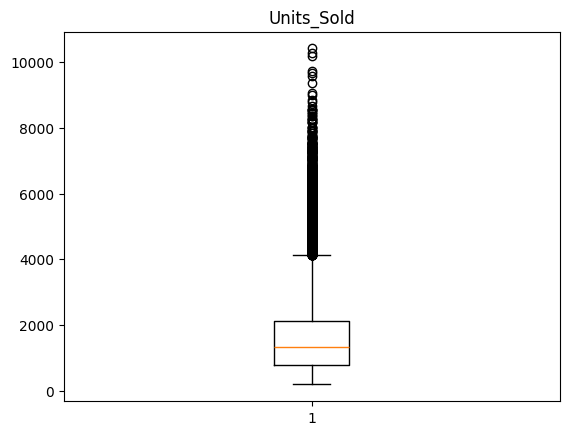

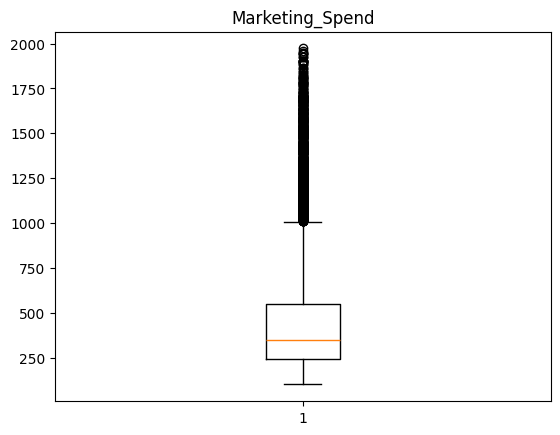

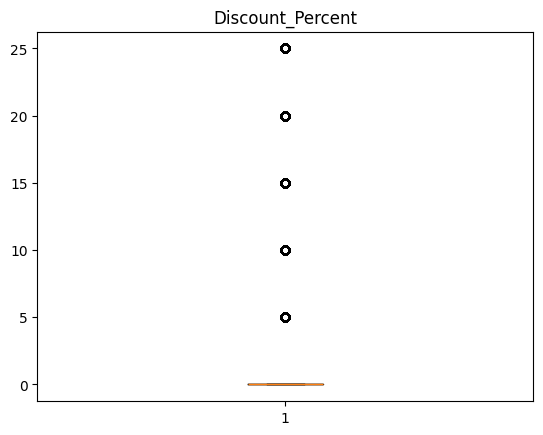

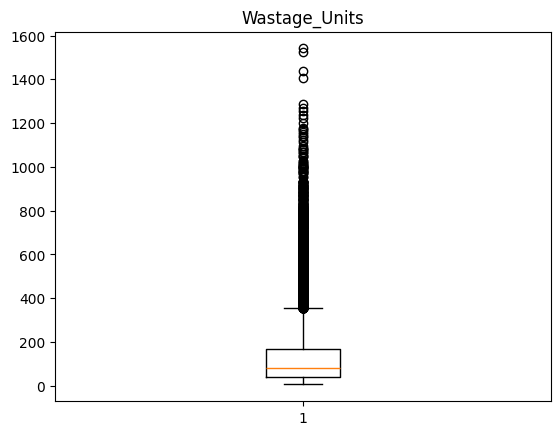

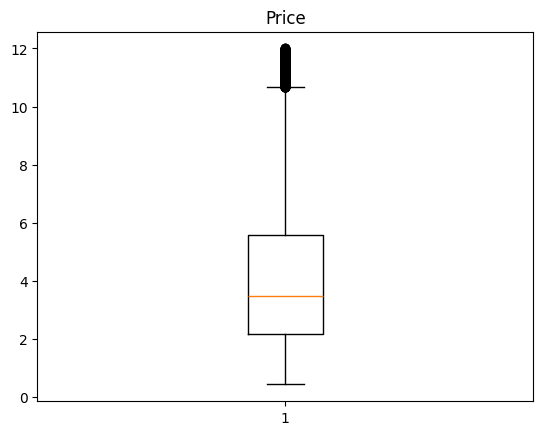

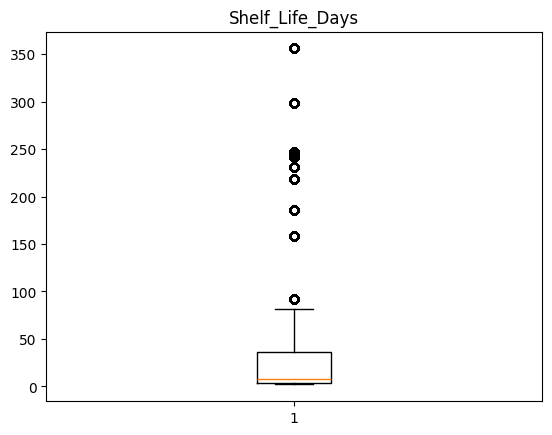

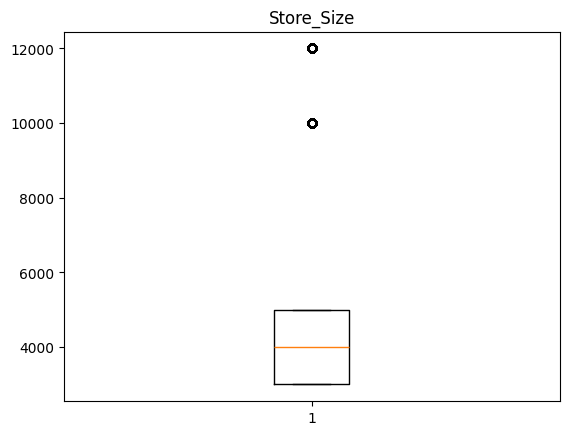

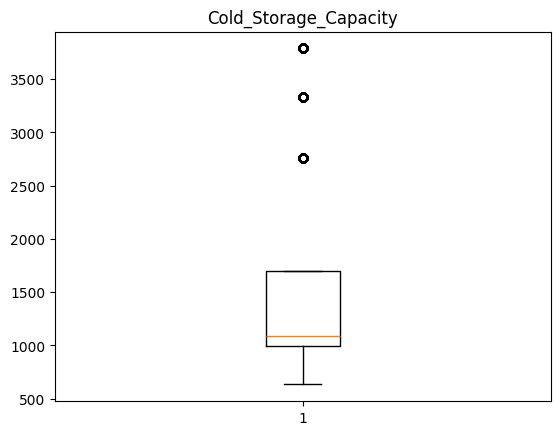

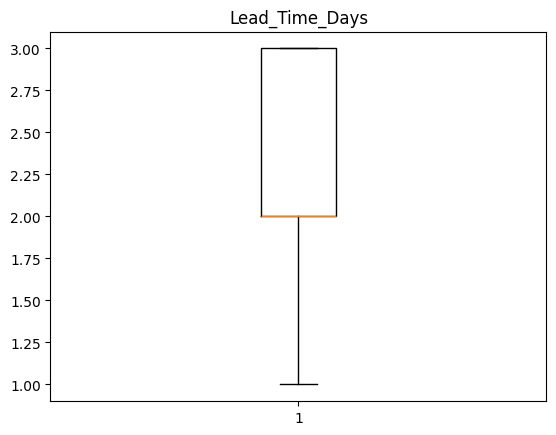

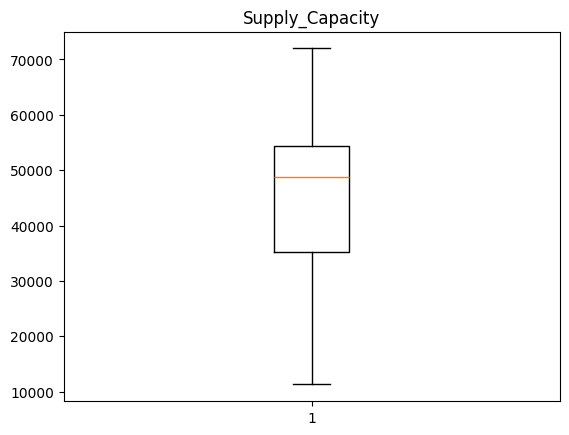

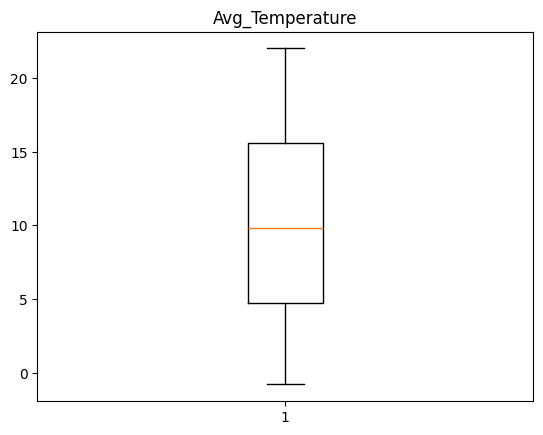

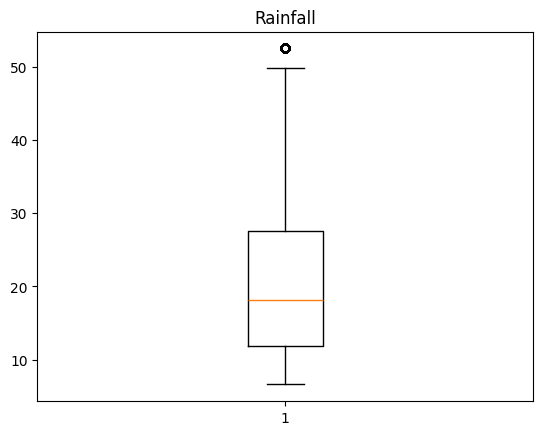

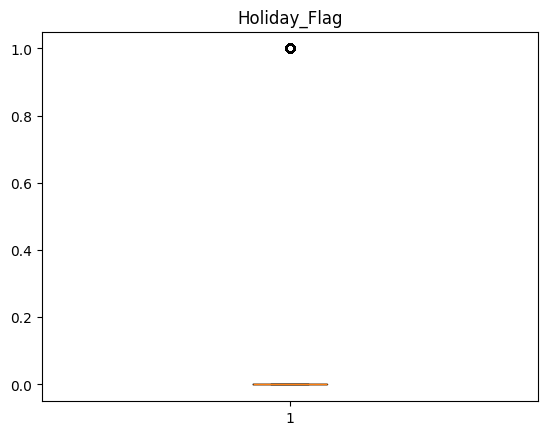

In [25]:
#check for distribution of numeric data
outlier_df_= cleaned_df.select_dtypes(include=['int','float']).iloc[0:,1:].columns.to_list()
for col in outlier_df_:
    plt.boxplot(cleaned_df[col])
    plt.title(col)
    plt.show()

                           Store_ID  Units_Sold  Marketing_Spend  \
Store_ID               1.000000e+00   -0.178547        -0.000752   
Units_Sold            -1.785471e-01    1.000000         0.041274   
Marketing_Spend       -7.524660e-04    0.041274         1.000000   
Discount_Percent      -1.557056e-04    0.135754         0.016597   
Wastage_Units         -1.235174e-01    0.668975         0.193224   
Price                  3.661472e-03   -0.380227        -0.189831   
Shelf_Life_Days        4.484890e-16   -0.136300         0.287407   
Store_Size            -4.303332e-01    0.494869         0.001420   
Cold_Storage_Capacity -3.510954e-01    0.486634         0.002093   
Lead_Time_Days        -1.291187e-16   -0.116609         0.099232   
Supply_Capacity       -1.028280e-16   -0.128011        -0.052029   
Avg_Temperature        1.581120e-02    0.030311        -0.038349   
Rainfall               3.388099e-02   -0.074203         0.002222   
Holiday_Flag          -1.175994e-02    0.051923 

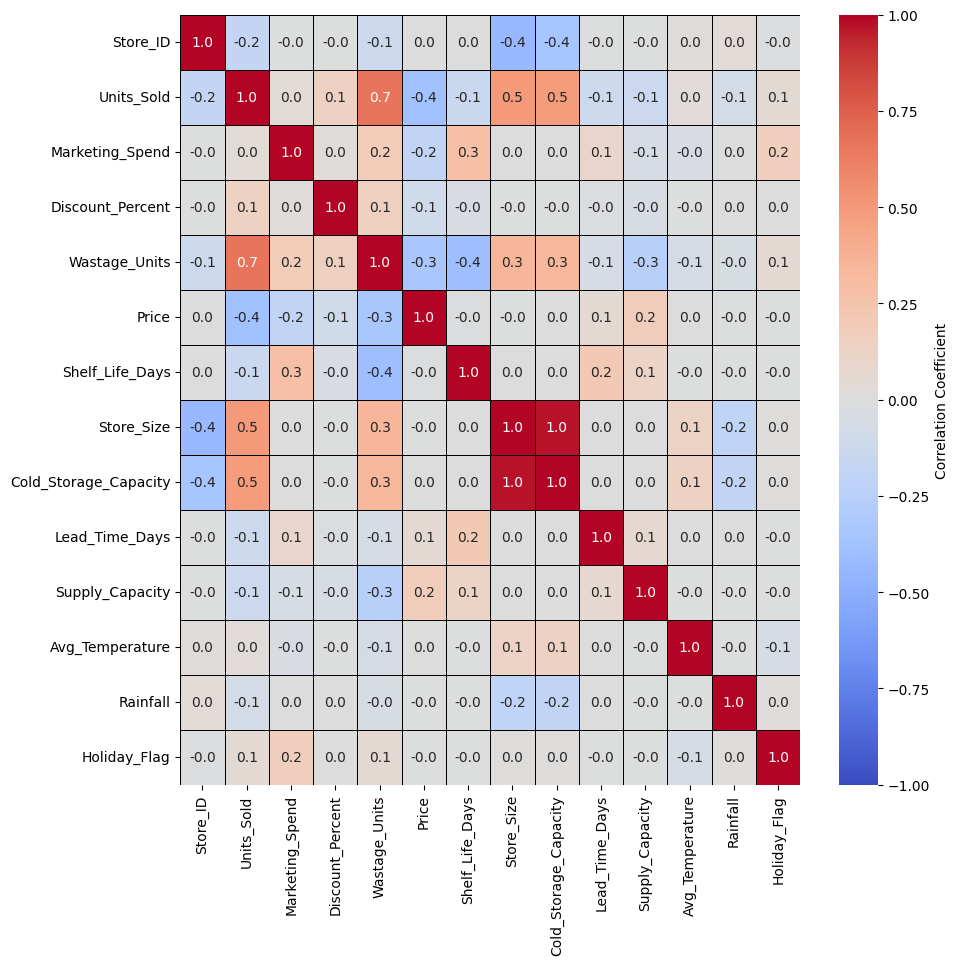

In [26]:
#Calculate the correlation with target variables
df_= cleaned_df.select_dtypes(include=np.number).iloc[0:,1:].corr()
correlation=cleaned_df.select_dtypes(include=np.number).iloc[0:,1:].corr()
print(correlation)

#draw the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    data = correlation,
    annot=True,
    fmt='.1f',
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'},  
    ax=ax
)
plt.show()

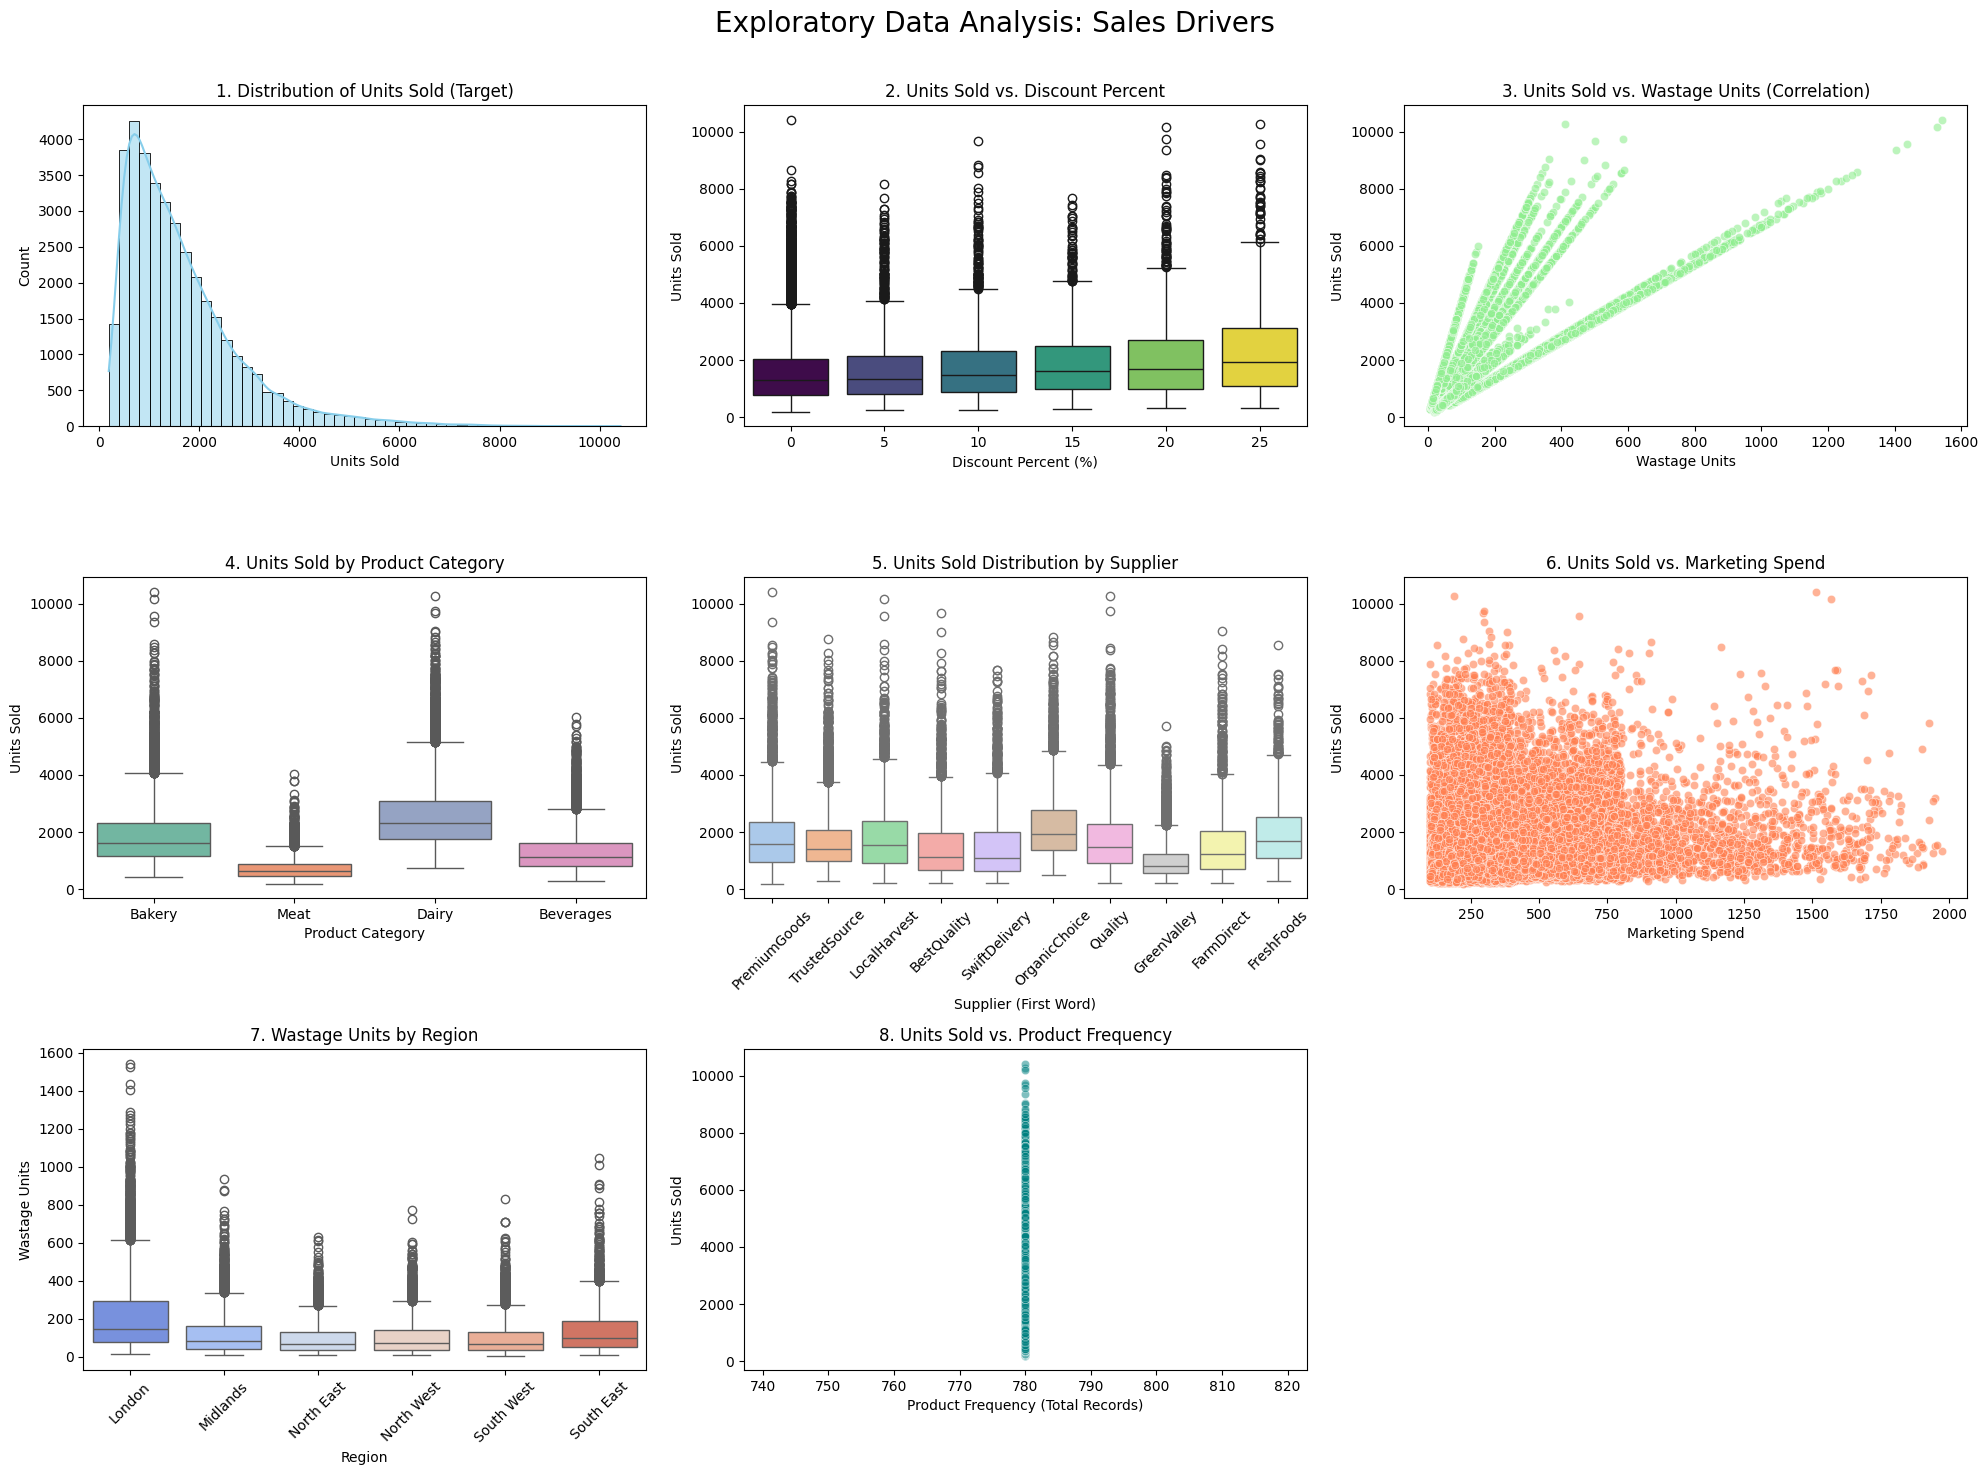

In [33]:


# Calculate Product_Count feature for visualization
product_counts_map = cleaned_df['Product_ID'].value_counts().to_dict()
cleaned_df['Product_Count'] = cleaned_df['Product_ID'].map(product_counts_map)

# Define columns for enhanced EDA
eda_cols = ['Marketing_Spend', 'Discount_Percent', 'Wastage_Units', 'Region', 
            'Product_Category', 'Supplier_Name', 'Product_Count']
df_eda = cleaned_df[['Units_Sold'] + eda_cols].dropna()

fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
plt.suptitle('Exploratory Data Analysis: Sales Drivers', fontsize=20)
axes = axes.flatten()

# --- Plot 1: Target Distribution (Units_Sold) ---
sns.histplot(df_eda['Units_Sold'], kde=True, bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('1. Distribution of Units Sold (Target)')
axes[0].set_xlabel('Units Sold')

# --- Plot 2: Units Sold vs. Discount Percent (Box Plot) ---
sns.boxplot(x='Discount_Percent', y='Units_Sold', data=df_eda, ax=axes[1], hue='Discount_Percent', palette='viridis', legend=False)
axes[1].set_title('2. Units Sold vs. Discount Percent')
axes[1].set_xlabel('Discount Percent (%)')
axes[1].set_ylabel('Units Sold')

# --- Plot 3: Units Sold vs. Wastage Units (Scatter) ---
sns.scatterplot(x='Wastage_Units', y='Units_Sold', data=df_eda, ax=axes[2], alpha=0.6, color='lightgreen')
axes[2].set_title('3. Units Sold vs. Wastage Units (Correlation)')
axes[2].set_xlabel('Wastage Units')
axes[2].set_ylabel('Units Sold')

# --- Plot 4: Units Sold by Product Category (Box Plot) ---
sns.boxplot(x='Product_Category', y='Units_Sold', data=df_eda, ax=axes[3], hue='Product_Category', palette='Set2', legend=False)
axes[3].set_title('4. Units Sold by Product Category')
axes[3].set_xlabel('Product Category')
axes[3].set_ylabel('Units Sold')

# --- Plot 5: Units Sold by Supplier (Box Plot) ---
# Truncate supplier names for readability
df_eda['Short_Supplier'] = df_eda['Supplier_Name'].apply(lambda x: x.split()[0])
sns.boxplot(x='Short_Supplier', y='Units_Sold', data=df_eda, ax=axes[4], hue='Short_Supplier', palette='pastel', legend=False)
axes[4].set_title('5. Units Sold Distribution by Supplier')
axes[4].set_xlabel('Supplier (First Word)')
axes[4].set_ylabel('Units Sold')
axes[4].tick_params(axis='x', rotation=45)

# --- Plot 6: Units Sold vs. Marketing Spend (Scatter) ---
sns.scatterplot(x='Marketing_Spend', y='Units_Sold', data=df_eda, ax=axes[5], alpha=0.6, color='coral')
axes[5].set_title('6. Units Sold vs. Marketing Spend')
axes[5].set_xlabel('Marketing Spend')
axes[5].set_ylabel('Units Sold')

# --- Plot 7: Regional Wastage Distribution (Box Plot) ---
sns.boxplot(x='Region', y='Wastage_Units', data=df_eda, ax=axes[6], hue='Region', palette='coolwarm', legend=False)
axes[6].set_title('7. Wastage Units by Region')
axes[6].set_xlabel('Region')
axes[6].set_ylabel('Wastage Units')
axes[6].tick_params(axis='x', rotation=45)

# --- Plot 8: Units Sold vs. Product Frequency (Scatter/JointPlot) ---
sns.scatterplot(x='Product_Count', y='Units_Sold', data=df_eda, ax=axes[7], color='teal', alpha=0.5)
axes[7].set_title('8. Units Sold vs. Product Frequency')
axes[7].set_xlabel('Product Frequency (Total Records)')
axes[7].set_ylabel('Units Sold')

# --- Plot 9: Empty (Reserved for future use/space) ---
axes[8].set_visible(False) 

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Clean up temporary column
cleaned_df = cleaned_df.drop(columns=['Product_Count'])

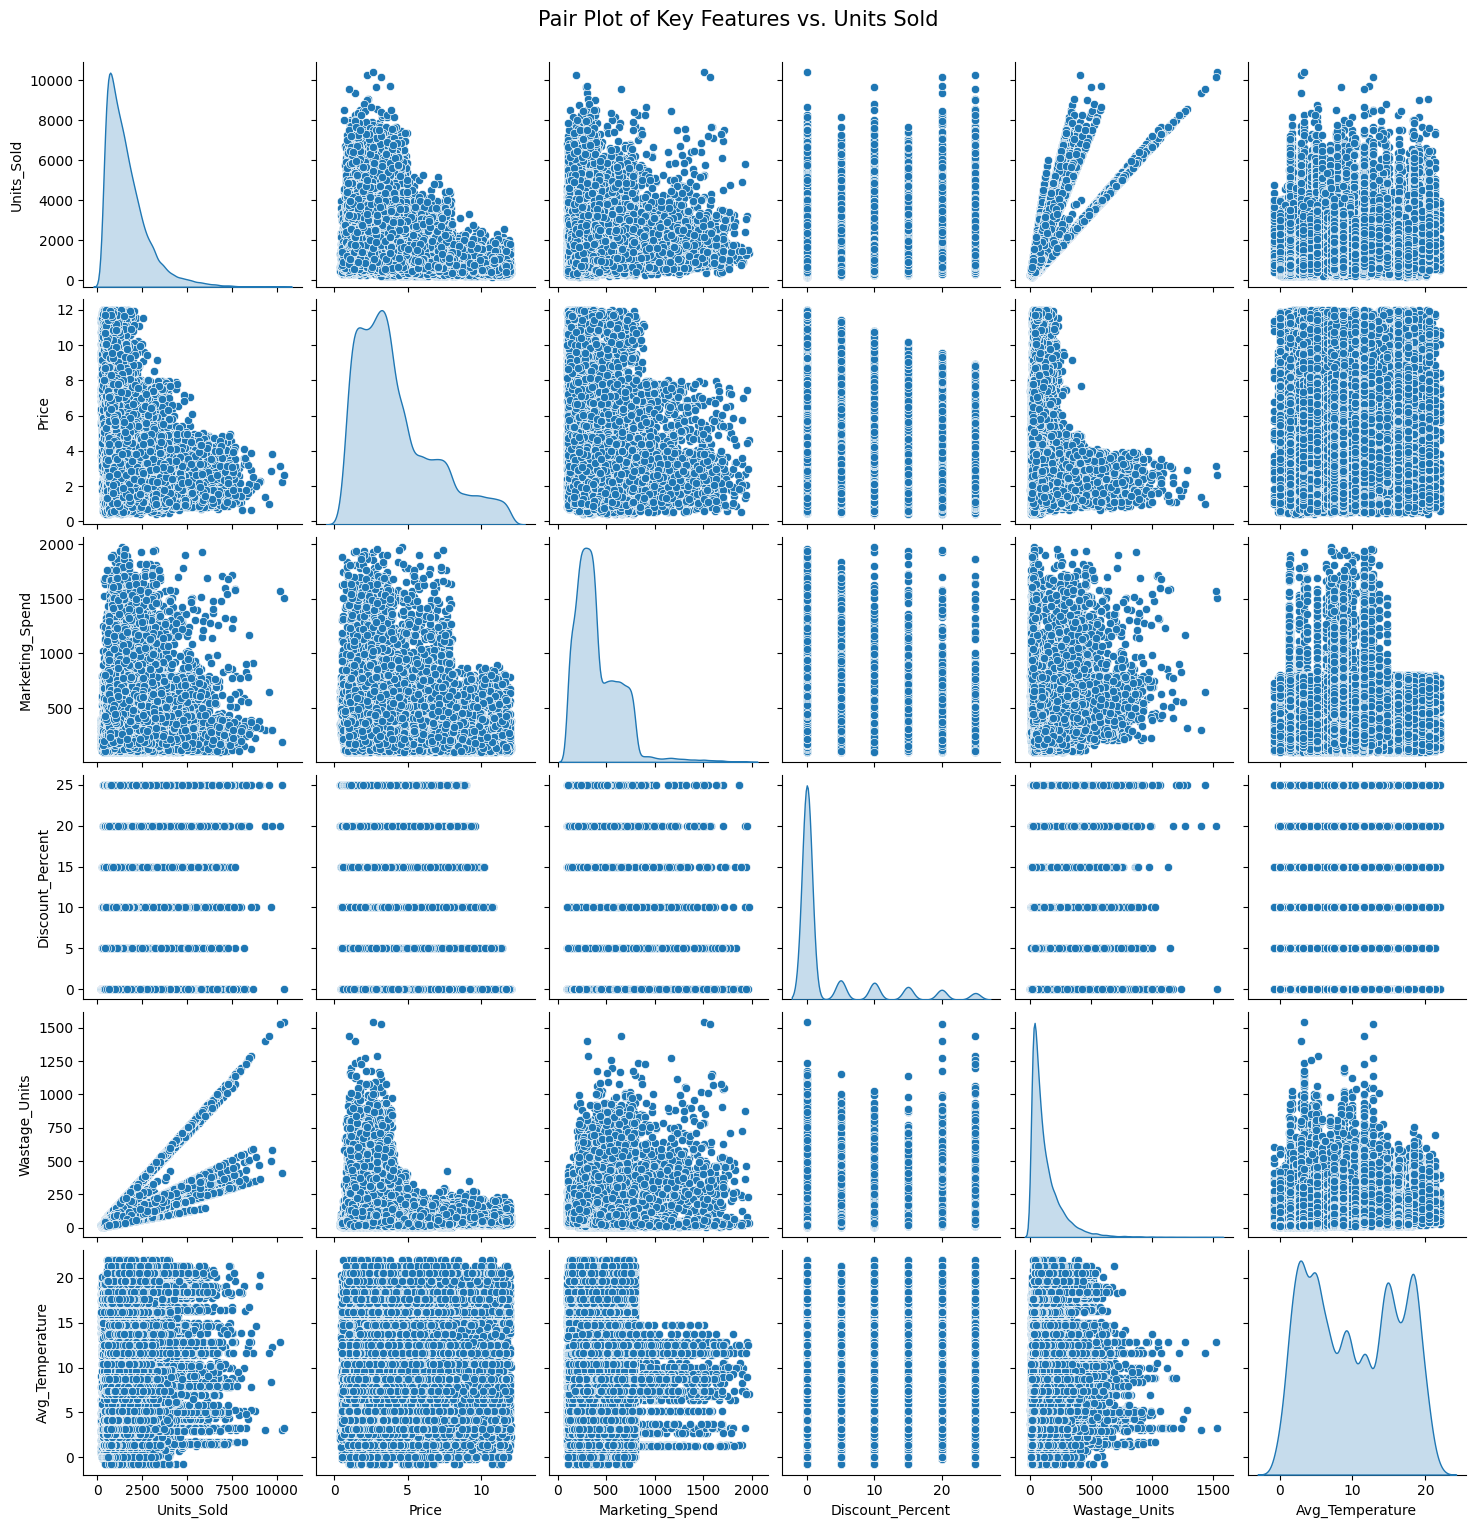

In [ ]:
pairplot_cols = [
    'Units_Sold',
    'Price', 
    'Marketing_Spend',
    'Discount_Percent', 
    'Wastage_Units', 
    'Avg_Temperature'
]

df_pair = cleaned_df[pairplot_cols].copy()

sns.pairplot(df_pair, diag_kind='kde')
plt.suptitle('Pair Plot of Key Features vs. Units Sold', y=1.02, fontsize= 15)
plt.show()

In [ ]:
#save dataset in EDA
save_path = r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\FrostMart\Model\model_data.csv"
# Save the DataFrame to CSV
cleaned_df.to_csv(save_path, index=False)